In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [146]:
# convert CSV file into pandas DataFrame
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
train_size = df_train.shape[0]
test_size = df_test.shape[0]

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploring our dataset

In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [148]:
# exploring the target variable 'SalePrice'
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

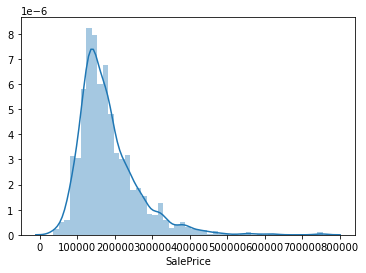

In [149]:
sns.distplot(df_train['SalePrice']) #histogram of the target variable

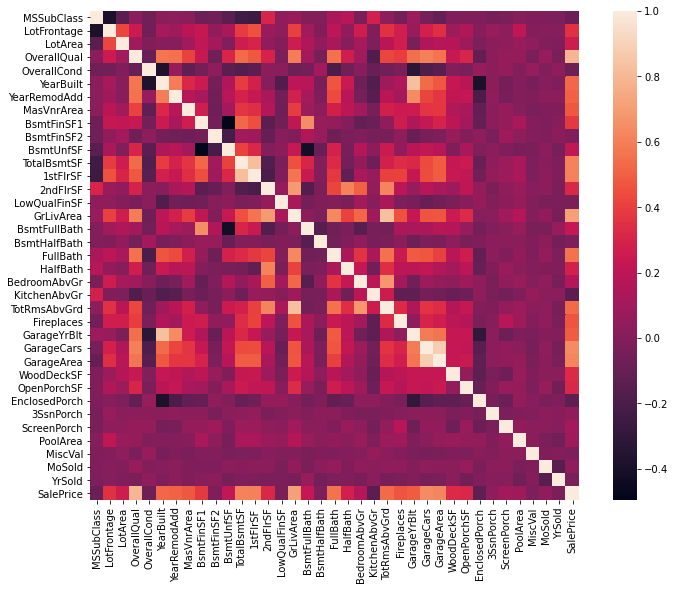

In [150]:
# Explore corelation between features and the target variable using Correlation matrix and heatmap
corr = df_train.corr()
figure, axis = plt.subplots(figsize=(12,9))
sns.heatmap(corr,square=True)

> **The heatmap shows the follwing:**

- 'GarageCars' & 'GarageArea' are lineraly correlated and the same goes to 'TotalBsmtSF' & '1stFlrSF' ( one of them can be removed )
- Target variabe 'SalePrice' is highly affected by the follwing features ( GarageArea, GarageCars, FullBath , OverAllQual ,GrLiveArea )

# Handling Outliers

Checking the outliers in features that target variable will be most affected by

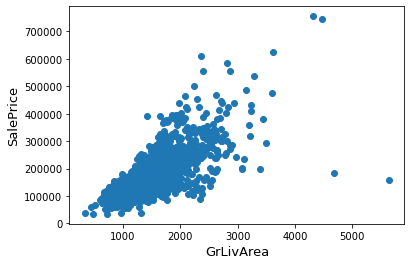

In [151]:
fig , ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [152]:
# Removing the two extreme values in the lower 
outlier_1 = df_train['GrLivArea'].sort_values(ascending=False).head(2).index
df_train = df_train.drop(outlier_1)

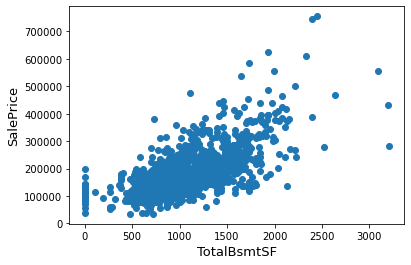

In [153]:
fig , ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF' ], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF' , fontsize=13)
plt.show()

In [154]:
# Removing the values after 3000
outlier_2 = df_train['TotalBsmtSF'].sort_values(ascending=False).head(2).index
df_train = df_train.drop(outlier_2)

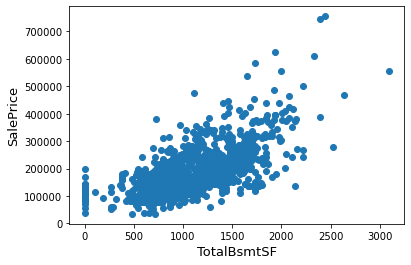

In [155]:
fig , ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF' ], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF' , fontsize=13)
plt.show()

# Handling missing Data

In [156]:
# Drop the target variable coloumn
y = df_train.SalePrice
df_train.drop(['SalePrice'] , axis=1 , inplace=True)
print("Data size is : {}".format(df_train.shape))

Data size is : (1456, 79)


In [157]:
# Exploring number of missing values in each colomn
tot_df = df_train.isnull().sum().sort_values(ascending=False)
# Getting percentage of the missing data to total data samples
percent_df = ( tot_df / df_train.shape[0] )
missing_df = pd.concat([tot_df,percent_df] , axis=1 , keys= ["num" , "percentage"])
missing_df.head(35)

,num,percentage
PoolQC,1450,0.995879
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1175,0.807005
FireplaceQu,690,0.473901
LotFrontage,258,0.177198
GarageCond,81,0.055632
GarageType,81,0.055632
GarageYrBlt,81,0.055632
GarageFinish,81,0.055632


- "Garage%" missing data come from the same observations and it's only 5% of the data, from the heatmab we concluded that GarageCar variable is correlated with GarageYrBlt, so all of "Garage%" variables will be removed and leave "GarageCar" feature only. Same goes to "Bsmt%" features.

In [158]:
# Drop lineraly correlated features 
col_to_drop = ['GarageCond' , 'GarageQual' , 'GarageYrBlt' , 'GarageFinish' ,
               'GarageType' , 'BsmtCond' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType2' , 'BsmtFinType1']
df_filtered= df_train.drop(df_train[col_to_drop] , 1)

df_filtered.isnull().sum().sort_values(ascending=False).head(20)

PoolQC           1450
MiscFeature      1402
Alley            1365
Fence            1175
FireplaceQu       690
LotFrontage       258
MasVnrArea          8
MasVnrType          8
Electrical          1
Exterior2nd         0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
SaleCondition       0
ExterQual           0
OverallCond         0
ExterCond           0
Foundation          0
BsmtFinSF1          0
dtype: int64

In [159]:
# Impute remaining Missing Data 

df_filtered["PoolQC"] = df_filtered["PoolQC"].fillna("None")
df_filtered["MiscFeature"] = df_filtered["MiscFeature"].fillna("None")
df_filtered["Fence"] = df_filtered["Fence"].fillna("None")
df_filtered["Alley"] = df_filtered["Alley"].fillna("None")
df_filtered["FireplaceQu"] = df_filtered["FireplaceQu"].fillna("None")
df_filtered['LotFrontage'] = df_filtered['LotFrontage'].fillna(df_filtered['LotFrontage'].mean())

df_filtered['MasVnrArea'] = df_filtered['MasVnrArea'].fillna(0)
df_filtered["MasVnrType"] = df_filtered["MasVnrType"].fillna("None")

# df.value_counts().index[0] returns the most frequent element in a column

df_filtered['Electrical'] = df_filtered['Electrical'].fillna(df_filtered['Electrical'].value_counts().index[0])


# Check if all missing data are handled
df_filtered.isnull().sum().max()

0

# Label Encoding ( Convert categorical data into numerical )

In [160]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuil

In [161]:
# Converting features with categorical meaning that has numerical values into strings to be encoded later

#MSSubClass=The building class

df_filtered['MSSubClass'] = df_filtered['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_filtered['OverallCond'] = df_filtered['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_filtered['YrSold'] = df_filtered['YrSold'].astype(str)
df_filtered['MoSold'] = df_filtered['MoSold'].astype(str)

In [162]:
# Label Encoding some categorical variables that may contain ordering information


from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 
        'Functional', 'Fence', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir',
        'MSSubClass', 'OverallCond', 'YrSold', 'MoSold']

le = LabelEncoder()


for col in cols:
    # Use LabelEncoder to do the numeric transformation
    df_filtered[col]=le.fit_transform(df_filtered[col].values)
        
# check if all categorical data is transformed
df_filtered.shape

(1456, 69)

In [163]:
# Encoding remaining categorical features by creating dummies
df_filtered = pd.get_dummies(df_filtered)
df_filtered.info() 
print(df_filtered.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 205 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(47), uint8(156)
memory usage: 790.6 KB
(1456, 205)


# Machine Learning Model

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered,
                                y,
                                test_size=0.2,
                                random_state= 42)

In [170]:
# function to compute root mean score log error
def rmsle(y_true, y_pred):
    diffs = np.log(y_true + 1) - np.log(y_pred + 1)
    squares = np.power(diffs, 2)
    err = np.sqrt(np.mean(squares))
    return err 

In [172]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error

steps = [('scaler' , StandardScaler()) ,
         ('ridge' , Lasso(max_iter=100000))]

pipeline = Pipeline(steps)
                                              
# Fit logreg to the train set
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)



# Get the accuracy score of the model and root mean score log error and print it
print("Score is:" , pipeline.score(X_test,y_test))
print("RMSLE is:" , rmsle(y_test,y_pred))

Score is: 0.8603687808669571
RMSLE is: 0.1836717740577064


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
